**ML Term Paper: YouTube AdView Prediction**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [ ]:
data_train = pd.read_csv("/content/train.csv")
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:
data_train.shape

(14999, 9)

In [ ]:
data_train.describe()

,adview
count,1.499900e+04
mean,2.107791e+03
std,5.237711e+04
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,6.000000e+00
max,5.429665e+06


In [ ]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [ ]:
# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

In [ ]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])

In [ ]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [ ]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

In [ ]:
train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)

In [ ]:
def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

In [ ]:
time1=time.apply(func_sec)
data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


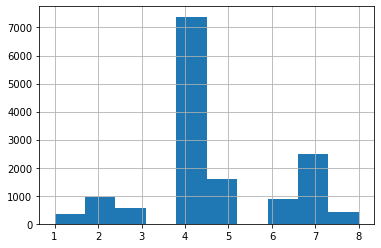

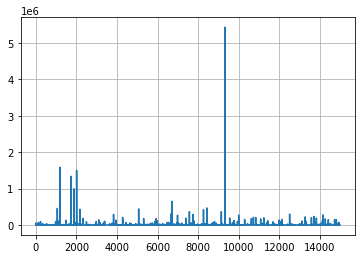

In [ ]:
# Visualization
# Individual Plots
plt.hist(data_train["category"])
plt.grid()
plt.show()
plt.plot(data_train["adview"])
# plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.grid()
plt.show()

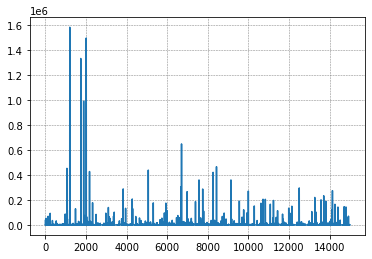

In [ ]:
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]
plt.plot(data_train["adview"])
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


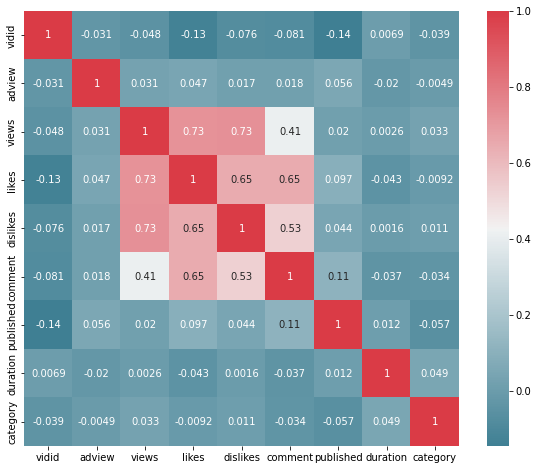

In [ ]:
# Heatmap
# Red means highly corelated and then decreasing
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [ ]:
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
#
data_train=data_train.drop(["published"],axis=1)
data_train=data_train.drop(["duration"],axis=1)
data_train=data_train.drop(["category"],axis=1)

data_train.head()

,views,likes,dislikes,comment
0,1031602,8523,363,1095
1,1707,56,2,6
2,2023,25,0,2
3,620860,777,161,153
4,666,1,0,0


In [ ]:
# Train test split converts - pandas array
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape

(11708, 4)

In [ ]:

# X_Train.describe()
# Normalise Data 
# converts into numpy array
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

X_train.mean()

0.006366021486827931

In [ ]:
# Evaluation Metrics
from sklearn import metrics
mae=[0,0,0,0,0]
mse=[0,0,0,0,0]
rmse=[0,0,0,0,0]

def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  a = metrics.mean_absolute_error(y_test, prediction)
  b = metrics.mean_squared_error(y_test, prediction)
  c = np.sqrt(metrics.mean_squared_error(y_test, prediction))

  #plt.scatter(X_test,prediction)
  #plt.show()

  print('Mean Absolute Error:', a/100)
  print('Mean Squared Error:', b/100)
  print('Root Mean Squared Error:', c/100)

  return ([a,b,c])

In [ ]:
y_test.shape

(2928, 1)

In [ ]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
mae[0],mse[0],rmse[0] = print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 35.014165356510965
Mean Squared Error: 8391577.364650715
Root Mean Squared Error: 289.6821942172269


In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
mae[1],mse[1],rmse[1] = print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 27.29929746454593
Mean Squared Error: 16547900.876582399
Root Mean Squared Error: 406.79111195529333


In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
mae[2],mse[2],rmse[2] = print_error(X_test,y_test, random_forest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error: 33.73107534115999
Mean Squared Error: 7546556.031812769
Root Mean Squared Error: 274.70995671458235


In [ ]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
mae[3],mse[3],rmse[3] = print_error(X_test,y_test, supportvector_regressor)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 16.969491298198633
Mean Squared Error: 8336824.624794457
Root Mean Squared Error: 288.7355992044358


In [ ]:
# Artificial Neural Network
import keras
from tensorflow import keras
from keras.layers import Dense
ann = keras.models.Sequential([
                                Dense(6, activation="relu",
                                input_shape=X_train.shape[1:]),
                                Dense(4,activation="relu"),
                                Dense(2,activation="relu"),
                                Dense(1,activation="sigmoid")
                                ])

In [ ]:
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["Accuracy"])

In [ ]:
history=ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
366/366 [==============================] - 2s 3ms/step - loss: 767406464.0000 - Accuracy: 0.4271
Epoch 2/5
366/366 [==============================] - 1s 2ms/step - loss: 767405824.0000 - Accuracy: 0.4285
Epoch 3/5
366/366 [==============================] - 1s 2ms/step - loss: 767405824.0000 - Accuracy: 0.4285
Epoch 4/5
366/366 [==============================] - 1s 2ms/step - loss: 767405632.0000 - Accuracy: 0.4285
Epoch 5/5
366/366 [==============================] - 1s 2ms/step - loss: 767405312.0000 - Accuracy: 0.4285


In [ ]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 30        
                                                                 
 dense_5 (Dense)             (None, 4)                 28        
                                                                 
 dense_6 (Dense)             (None, 2)                 10        
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mae[4],mse[4],rmse[4] = print_error(X_test,y_test,ann)

92/92 [==============================] - 0s 1ms/step
Mean Absolute Error: 16.974290664493832
Mean Squared Error: 8336911.752970372
Root Mean Squared Error: 288.7371079887442


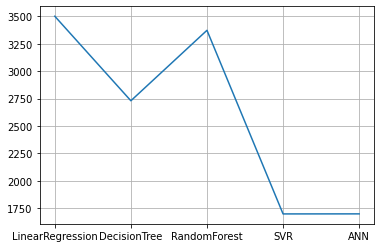

In [ ]:
plt.plot(["LinearRegression","DecisionTree", "RandomForest","SVR", "ANN"],mae)
plt.grid()
plt.show()

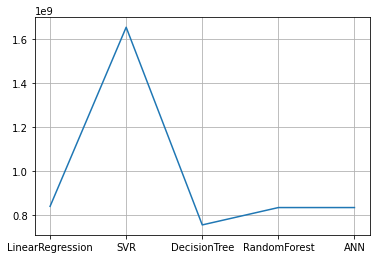

In [ ]:
plt.plot(["LinearRegression","SVR","DecisionTree","RandomForest","ANN"],mse)
plt.grid()
plt.show()

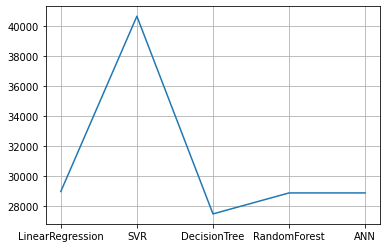

In [ ]:
plt.plot(["LinearRegression","SVR","DecisionTree","RandomForest","ANN"],rmse)
plt.grid()
plt.show()

In [ ]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "DecisionTree_youtubeAdview.pkl")

['DecisionTree_youtubeAdview.pkl']

In [ ]:
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

**Compare actual & predicted views**

In [ ]:
# comparison of actual & predicrted advertisemetn views
from keras.models import load_model
model = load_model("ann_youtubeadview.h5")

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# X_test = data_train
X_test = X_train
X_test=scaler.fit_transform(X_test)

prediction = model.predict(X_test)

prediction=pd.DataFrame(prediction)
# prediction.info()

prediction = prediction.rename(columns={0: "Adview"})
prediction.head()

366/366 [==============================] - 1s 1ms/step


,Adview
0,0.819190
1,0.819117
2,0.819193
3,0.819213
4,0.819161


In [ ]:
prediction.shape

(11708, 1)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(11708, 4)
(11708, 1)


In [ ]:
x_ax = [i for i in range(0,11708)]
x_ax = np.array(x_ax)
print(x_ax.shape)

(11708,)


Average view difference [16.93606906]


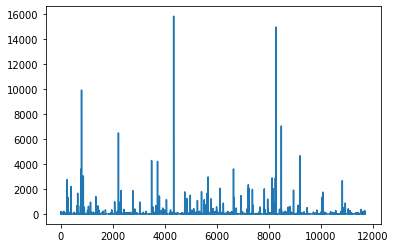

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(prediction)
y = np.array(y_train)

x_final = abs(x - y) / 100
errorSum = sum(x_final)
ans = errorSum / 11708
print("Average view difference",ans)


#plt.scatter(range(len(prediction)),prediction,color='b')
#plt.scatter(range(len(y_train)),y_train,color='r')

# actucal - predicted no difference
#plt.plot(range(len(x_final)),x_final)
#plt.show()

plt.plot(range(len(x_final)),x_final)
plt.show()


#plt.plot(x_ax,x_final,'b')
#plt.show()

#plt.scatter(x,y,c='crimson')
#p1 = max(max(prediction), max(y_train))
#p2 = min(min(prediction), min(y_train))
#plt.plot([p1, p2], [p1, p2], 'b-')
#plt.show()


#plt.plot(x_ax, x,'r')
#plt.show()
#plt.plot(x_ax, y,'b')
#plt.show()

**Testing**

In [ ]:
import pandas as pd
data_test = pd.read_csv("/content/test.csv")
data_test.shape

FileNotFoundError: ignored

In [ ]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [ ]:
from keras.models import load_model
model = load_model("ann_youtubeadview.h5")

In [ ]:
# Removing character "F" present in data
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']

In [ ]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [ ]:
# Convert values to integers for views, likes, comments and dislikes
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])

In [ ]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [ ]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train=pd.read_csv("test.csv")
mp = pd.read_csv("test.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_test["duration"]=time1
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [ ]:
data_test=data_test.drop(["vidid"],axis=1)
data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = data_test
X_test=scaler.fit_transform(X_test)

In [ ]:
prediction = model.predict(X_test)

268/268 [==============================] - 0s 1ms/step


In [ ]:
prediction=pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float32
dtypes: float32(1)
memory usage: 33.5 KB


In [ ]:
prediction = prediction.rename(columns={0: "Adview"})

In [ ]:
#prediction.multiply(1)

In [ ]:
prediction.head()

,Adview
0,2097.624756
1,2303.993408
2,1279.826294
3,1151.791870
4,2010.492310


In [ ]:
prediction.to_csv('predictions.csv')